In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import sys 
sys.path.append('/Users/jessicahassibi/PycharmProjects/bachelor-thesis/src/data') # replace with your absolute path
# import modules from another folder
import WikiScraper
import  data_analysis_helpers

In [22]:
from importlib import reload
reload(data_analysis_helpers)

<module 'data_analysis_helpers' from '/Users/jessicahassibi/PycharmProjects/bachelor-thesis/src/data/data_analysis_helpers.py'>

In [1]:
persecuted_composers_path = "../data/verfolgte_komponisten_texte.json" # path to save wikipedia texts to or load from if file already existing
df = data_analysis_helpers.get_composers_dataframe(persecuted_composers_path)
df.head()

NameError: name 'data_analysis_helpers' is not defined

In [ ]:
supported_composers_path = "../data/unterstützte_komponisten_texte.json"
df = data_analysis_helpers.get_composers_dataframe(supported_composers_path)
df.head()

In [26]:
languages = ['de', 'en', 'ar', 'fr', 'es', 'it']
language_paragraphs = [df.de_paragraphs, df.en_paragraphs, df.ar_paragraphs, df.fr_paragraphs, df.es_paragraphs, df.it_paragraphs]
languages_count_dict = data_analysis_helpers.language_analyzer(languages, language_paragraphs)
print(languages_count_dict)

{'de': {'articles': 255, 'paragraphs': 1204, 'words': 176847}, 'en': {'articles': 193, 'paragraphs': 867, 'words': 138903}, 'ar': {'articles': 68, 'paragraphs': 191, 'words': 13838}, 'fr': {'articles': 162, 'paragraphs': 594, 'words': 81889}, 'es': {'articles': 87, 'paragraphs': 341, 'words': 48336}, 'it': {'articles': 98, 'paragraphs': 452, 'words': 57939}}


In [28]:
totals = data_analysis_helpers.get_total_counts(languages_count_dict)
print("Gesamtzahl der Artikel: ", totals[0])
print("Gesamtzahl der Paragraphen: ", totals[1])
print("Gesamtzahl der Wörter: ", totals[2])

Gesamtzahl der Artikel:  863
Gesamtzahl der Paragraphen:  3649
Gesamtzahl der Wörter:  517752


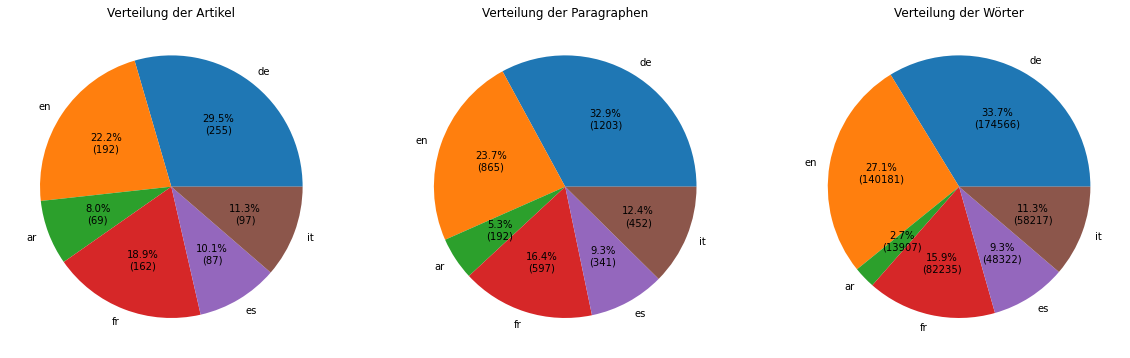

In [35]:
# Creating autocpt arguments
def pct_func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# 3 Pie charts to be side by side
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,20))

# Plotting articles pie chart
sizes = [languages_count_dict[lang]["articles"] for lang in languages_count_dict.keys()]
ax1.pie(sizes, labels = languages,autopct = lambda pct: pct_func(pct, sizes))
ax1.set_title("Verteilung der Artikel")

# Plotting paragraphs pie chart
sizes = [languages_count_dict[lang]["paragraphs"] for lang in languages_count_dict.keys()]
ax2.pie(sizes, labels = languages,autopct = lambda pct: pct_func(pct, sizes))
ax2.set_title("Verteilung der Paragraphen")

# Plotting words pie chart
sizes = [languages_count_dict[lang]["words"] for lang in languages_count_dict.keys()]
ax3.pie(sizes, labels = languages,autopct = lambda pct: pct_func(pct, sizes))
ax3.set_title("Verteilung der Wörter")
 
# show plot
plt.show()

In [25]:
# Plotting the 20 articles with most words etc.

In [ ]:
# wieviel prozent der artikel in den versch. sprachen da